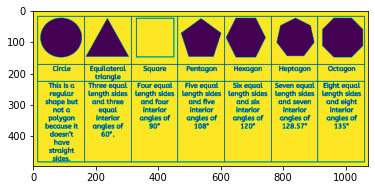

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# reading image
img = cv2.imread('1531289699_screen-shot-2018-03-25-at-18-54-16.png')
plt.imshow(img)

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)


# using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

In [31]:
len(contours)

660

In [33]:
# list for storing names of shapes
for contour in contours:
	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])

	# putting shape name at center of each shape
	if len(approx) == 3:
		cv2.putText(img, 'Triangle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

	elif len(approx) == 4:
		cv2.putText(img, 'Quadrilateral', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

	elif len(approx) == 5:
		cv2.putText(img, 'Pentagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

	elif len(approx) == 6:
		cv2.putText(img, 'Hexagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

	else:
		cv2.putText(img, 'circle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (225, 255,0), 2)

# displaying the image after drawing contours
cv2.imshow('shapes', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
len(approx)

20